<a href="https://colab.research.google.com/github/FranklineSweety/Python/blob/main/Modules%5CRegular_Expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview of Regular Expressions**




* Regular Expressions (sometimes called regex for short) allows a user to search for strings using almost any sort of rule they can come up. For example, finding all capital letters in a string, or finding a phone number in a document.
* Regular expressions are notorious for their seemingly strange syntax. This strange syntax is a byproduct of their flexibility. Regular expressions have to be able to filter out any string pattern you can imagine, which is why they have a complex string pattern format.





In [5]:
text = "The agent's phone number in 408-555-1234. Call soon!"

In [6]:
 'phone' in text

True

In [7]:
import re

let's see the format for regular expressions, because later on we will be searching for patterns that won't have such a simple solution.

In [8]:
pattern = 'phone'

In [9]:
re.search(pattern, text)

<re.Match object; span=(12, 17), match='phone'>

In [10]:
pattern = 'Not in text'

In [11]:
re.search(pattern, text)

re.search() will take the pattern, scan the text, and then returns a Match object. If no pattern is found, no output is given

In [12]:
pattern = 'phone'

In [13]:
match = re.search(pattern, text)

In [14]:
match

<re.Match object; span=(12, 17), match='phone'>

In [15]:
match.span()

(12, 17)

In [16]:
match.start()

12

In [17]:
match.end()

17

In [18]:
text = "my phone once, my phone twice"

In [19]:
match = re.search('phone', text)

In [20]:
match

<re.Match object; span=(3, 8), match='phone'>

 If we wanted a list of all matches, we can use .findall() method:

In [21]:
matches = re.findall('phone', text)

In [22]:
matches

['phone', 'phone']

In [23]:
len(matches)

2

To get actual match objects, use the iterator:

In [24]:
for match in re.finditer('phone',text):
  print(match)

<re.Match object; span=(3, 8), match='phone'>
<re.Match object; span=(18, 23), match='phone'>


In [25]:
for match in re.finditer('phone',text):
  print(match.span())

(3, 8)
(18, 23)


In [26]:
for match in re.finditer('phone',text):
  print(match.group())

phone
phone


In [27]:
match.group()

'phone'

### **Patterns**

We could just use search method if we know the exact phone or email, but what if we don't know it? We may know the general format, and we can use that along with regular expressions to search the document for strings that match a particular pattern.

**Character identifiers**
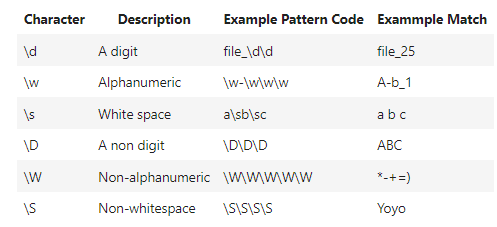




**Identifiers for Characters in Patterns**

In [28]:
text = "My phone number is 408-555-1234"

In [29]:
phone = re.search('408-555-1234',text)

In [30]:
phone

<re.Match object; span=(19, 31), match='408-555-1234'>

when we don't know the number?

In [31]:
phone = re.search(r'\d\d\d-\d\d\d-\d\d\d\d',text)

In [32]:
phone

<re.Match object; span=(19, 31), match='408-555-1234'>

**Quantifiers**

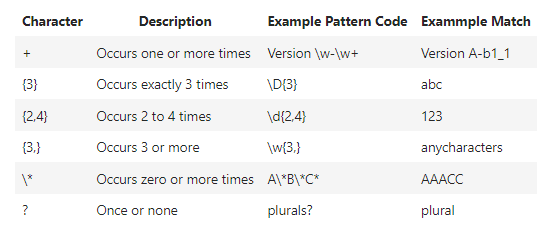

In [33]:
phone = re.search(r'\d{3}-\d{3}-\d{4}',text)

In [34]:
phone

<re.Match object; span=(19, 31), match='408-555-1234'>

**Groups**

What if we wanted to do two tasks, find phone numbers, but also be able to quickly extract their area code (the first three digits). We can use groups for any general task that involves grouping together regular expressions (so that we can later break them down).

Using the phone number example, we can separate groups of regular expressions using parenthesis:

In [35]:
phone_pattern = re.compile(r'(\d{3})-(\d{3})-(\d{4})')

**compile function**- It compiles together different regular expression pattern codes

In [36]:
results = re.search(phone_pattern, text)

In [37]:
results.group()

'408-555-1234'

*   Find based on group position
*   remember groups are separated by parenthesis ()
*   Something to note is that group ordering starts at 1. Passing in 0 returns everything

In [38]:
results.group(1)

'408'

In [39]:
results.group(2)

'555'

In [40]:
results.group(3)

'1234'

When given a non-position:

In [41]:
results.group(4)

IndexError: ignored

## **Additional Regex Syntax**
**or operator**




In [42]:
re.search(r'cat', 'the cat is here')

<re.Match object; span=(4, 7), match='cat'>

In [43]:
re.search(r'cat', 'the dog is here')

What if we need to search for  a cat or dog? We can use pipe operator (i.e. or operator)

In [44]:
re.search(r'cat|dog', 'the dog is here')

<re.Match object; span=(4, 7), match='dog'>

**The Wildcard Character**

Use a "wildcard" as a placement that will match any character placed there. You can use a simple period . for this. For example

In [47]:
re.findall(r'at','The cat in the hat went splat.')

['at', 'at', 'at']

In [48]:
re.findall(r'.at','The cat in the hat went splat.')

['cat', 'hat', 'lat']

In [49]:
re.findall(r'...at','The cat in the hat went splat.')

['e cat', 'e hat', 'splat']

**Starts with and Ends With**

We can use the ^ to signal starts with, and the $ to signal ends with

In [50]:
#Starts with a number
re.findall(r'^\d','1 is a number')

['1']

In [51]:
#Ends with a number
re.findall(r'\d$','The number is 2')

['2']

In [54]:
#Works if only it starts with a number
re.findall(r'^\d','number is 1')

[]

**Exclusion**

To exclude characters, we can use the ^ symbol in conjunction with a set of brackets []. Anything inside the brackets is excluded.

In [55]:
phrase = "there are 3 numbers 34 inside 5 this sentence."

In [60]:
pattern = r'[^\d]'

In [61]:
re.findall(pattern,phrase)

['t',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 ' ',
 'n',
 'u',
 'm',
 'b',
 'e',
 'r',
 's',
 ' ',
 ' ',
 'i',
 'n',
 's',
 'i',
 'd',
 'e',
 ' ',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 's',
 'e',
 'n',
 't',
 'e',
 'n',
 'c',
 'e',
 '.']

To get the words back together, use a + sign

In [64]:
re.findall(r'[^\d]+',phrase)

['there are ', ' numbers ', ' inside ', ' this sentence.']

To remove punctuation:

In [65]:
test_phrase = 'This is a string! But it has punctuation. How can we remove it?'

In [69]:
re.findall(r'[^!.?]+',test_phrase)

['This is a string', ' But it has punctuation', ' How can we remove it']

In [70]:
#space added
re.findall(r'[^!.? ]+',test_phrase)

['This',
 'is',
 'a',
 'string',
 'But',
 'it',
 'has',
 'punctuation',
 'How',
 'can',
 'we',
 'remove',
 'it']

In [71]:
clean = re.findall(r'[^!.? ]+',test_phrase)

In [72]:
clean

['This',
 'is',
 'a',
 'string',
 'But',
 'it',
 'has',
 'punctuation',
 'How',
 'can',
 'we',
 'remove',
 'it']

In [73]:
' '.join(clean)

'This is a string But it has punctuation How can we remove it'

**Brackets for Grouping**

example: if we wanted to find hyphenated words:

In [74]:
text = 'Only find the hypen-words in this sentence. But you do not know how long-ish they are'

In [78]:
pattern = r'[\w]+'

In [79]:
re.findall(pattern, text)

['Only',
 'find',
 'the',
 'hypen',
 'words',
 'in',
 'this',
 'sentence',
 'But',
 'you',
 'do',
 'not',
 'know',
 'how',
 'long',
 'ish',
 'they',
 'are']

In [80]:
pattern = r'[\w]+-'

In [82]:
re.findall(pattern, text)

['hypen-', 'long-']

In [83]:
pattern = r'[\w]+-[\w]+'

In [84]:
re.findall(pattern,text)

['hypen-words', 'long-ish']

**Parenthesis for Multiple Options**

If we have multiple options for matching, we can use parenthesis to list out these options

In [85]:
# Find words that start with cat and end with one of these options: 'fish','nap', or 'claw'
text = 'Hello, would you like some catfish?'
texttwo = "Hello, would you like to take a catnap?"
textthree = "Hello, have you seen this caterpillar?"

In [89]:
re.search(r'cat(fish|nap|claw)',text)

<re.Match object; span=(27, 34), match='catfish'>

In [90]:
re.search(r'cat(fish|nap|claw)',texttwo)

<re.Match object; span=(32, 38), match='catnap'>

In [91]:
re.search(r'cat(fish|nap|claw)',textthree)

In [93]:
re.search(r'cat(fish|nap|erpillar)',textthree)

<re.Match object; span=(26, 37), match='caterpillar'>